In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import root_scalar,fsolve
from torch.nn.functional import softmax
from math import e
import time

In [62]:
def entropy(y):
    ent = torch.special.entr(y)
    ent = torch.sum(ent,dim=-1)
    return ent
def w_fn(g,lamb = 1):
    lamb = torch.as_tensor(lamb)
    w = softmax(lamb*g,dim=-1)
    return w
def H_fn(g,lamb = 1):
    w = w_fn(g,lamb)
    H = entropy(w)
    return H
def H_const_1(lamb,*args):
    g,c = args
    H = H_fn(g,lamb)
    const = (torch.exp(H)/torch.numel(g))-c
    return const
def lim_g_SM(c,n):
    g = torch.cat((torch.ones(int(c*n)),torch.zeros(int((1-c)*n))))
    return entropy(softmax(g,dim=-1))

def H_const_2(lamb,*args):
    g,c = args
    H = H_fn(g,lamb)
    n = torch.shape(g,-1)
    const = H-lim_g_SM(c,)
    return const

In [19]:
from decimal import Decimal

In [85]:
g = g_list['1-0 c=0.7']
H_const_1(root_scalar(H_const_1,bracket=[0, 50000000],args = (g,0.8)).root,*(g,0.8))

tensor(0.)

In [72]:
for name,g in g_list.items():
    start_rs = time.time()
    try:
        lamb_rs = root_scalar(H_const_1,bracket=[0, 2000],args = (g,0.8)).root
    except:
        print(f'skipped {name}')
        continue
    end_rs = time.time()
    tempo_rs = end_rs-start_rs
    start_f = time.time()
    lamb_f = fsolve(H_const_1,x0 = 0,args = (g,0.8))
    end_f = time.time()
    tempo_f = end_f-start_f
    print(f'{name} & {10000*tempo_rs:.2f}$e^-4$ & {10000*tempo_f:.2f}$e^-4$ & {H_const_1(lamb_rs,*(g,0.8))} & {H_const_1(lamb_f,*(g,0.8))} & {lamb_rs:.2f} & {lamb_f[0]:.2f} \\\\')

skipped ones
skipped zeros
skipped 0,5
rand1 & 7.38$e^-4$ & 7.94$e^-4$ & 0.0 & 1.1102230246251565e-16 & 3.61 & 3.61 \\
rand2 & 4.46$e^-4$ & 6.46$e^-4$ & 0.0 & 8.881784197001252e-16 & 2.37 & 2.37 \\
rand3 & 3.87$e^-4$ & 6.37$e^-4$ & 0.0 & 1.1102230246251565e-16 & 3.04 & 3.04 \\
rand4 & 4.82$e^-4$ & 6.31$e^-4$ & 0.0 & 1.1102230246251565e-16 & 2.32 & 2.32 \\
0,5+-0,1 & 3.40$e^-4$ & 5.19$e^-4$ & 0.0 & 0.19999999999999973 & 28.08 & 0.00 \\
0,5+-0,2 & 3.85$e^-4$ & 6.43$e^-4$ & 0.0 & 1.1102230246251565e-16 & 13.00 & 13.00 \\
skipped 1-0 c=0.9
1-0 c=0.8 & 4.55$e^-4$ & 5.51$e^-4$ & 0.0 & -2.220446049250313e-16 & 16.93 & 7241.77 \\
1-0 c=0.7 & 5.53$e^-4$ & 5.46$e^-4$ & 0.0 & -0.10000000000000009 & 2.34 & 5517.29 \\
1-0 c=0.6 & 5.09$e^-4$ & 5.21$e^-4$ & 0.0 & 0.19999999999999973 & 1.77 & 0.00 \\
1-0 c=0.5 & 4.37$e^-4$ & 5.11$e^-4$ & 0.0 & 0.19999999999999973 & 1.52 & 0.00 \\
1-0 c=0.4 & 8.85$e^-4$ & 6.63$e^-4$ & -1.7881393432617188e-07 & -8.881784197001252e-16 & 1.40 & 1.40 \\
1-0 c=0.3 & 4.12$e^

In [ ]:
lamb = 
H_const(lamb,*(g,0.8))

In [52]:
entropy(g_list['1-0 c=0.8'])

tensor(0.)

In [68]:
for name,g in g_list.items():
    print(f'g = {g}, norm g = {g/torch.sum(g)},softmax = {w_fn(g)}')

g = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), norm g = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000]),softmax = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])
g = tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), norm g = tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),softmax = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])
g = tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000]), norm g = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000]),softmax = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])
g = tensor([0.1264, 0.1466, 0.6432, 0.6578, 0.7793, 0.4150, 0.6434, 0.7920, 0.4006,
        0.4868]), norm g = tensor([0.0248, 0.0288, 0.1263, 0.1292, 0.1531, 0.0815, 0.1264, 0.1556, 0.0787

In [66]:
n = 10
g = g_list['1-0 c=0.8']
print(f'entropia 0.8 1-0 = {entropy(g).item()}, entropia SM(0.8 1-0) {entropy(w_fn(g))} \n')
for i in range(50):
    g = torch.rand(n)
    print(f'entropia = {entropy(g)}, entropia_SM = {H_fn(g)}')
    try:
        lamb_rs = root_scalar(H_const_1,bracket=[0, 2000000],args = (g,0.8)).root
        print(f'lambda = {lamb_rs}, H = {H_fn(g,lamb_rs)}, constraint = {H_const_1(lamb_rs,*(g,0.8))} \n')
    except:
        print(f'skipped {name} \n')
    

entropia 0.8 1-0 = 0.0, entropia SM(0.8 1-0) 2.2516489028930664 

entropia = 2.983306407928467, entropia_SM = 2.272096872329712
lambda = 2.6202425012253987, H = 2.079441547393799, constraint = 0.0 

entropia = 1.8575220108032227, entropia_SM = 2.2472376823425293
lambda = 2.207986950874593, H = 2.0794413089752197, constraint = -1.7881393432617188e-07 

entropia = 2.4846980571746826, entropia_SM = 2.275233268737793
lambda = 3.300514724859304, H = 2.079441547393799, constraint = 0.0 

entropia = 2.0487236976623535, entropia_SM = 2.2471961975097656
lambda = 2.235143891384059, H = 2.079441547393799, constraint = 0.0 

entropia = 2.0874574184417725, entropia_SM = 2.2568249702453613
lambda = 2.4868850265216538, H = 2.079441547393799, constraint = 0.0 

entropia = 2.4149489402770996, entropia_SM = 2.2731425762176514
lambda = 3.1453946900643968, H = 2.079441547393799, constraint = 0.0 

entropia = 2.4134488105773926, entropia_SM = 2.248756170272827
lambda = 2.0632587460932332, H = 2.07944154739

In [119]:
lamb_list = torch.tensor(np.linspace(-50,50,200)).view(200,1)
n = 100
g_list = {'ones':torch.ones(n),'zeros':torch.zeros(n),'0,5': 0.5*torch.ones(n),
         'rand1': torch.rand(n), 'rand2':torch.rand(n),
         'rand3': torch.rand(n), 'rand4':torch.rand(n),
         '0,5+-0,1': 0.5*torch.ones(n)+0.1*torch.rand(n),
          '0,5+-0,2':0.5*torch.ones(n)+0.2*torch.rand(n),
         'ones':torch.ones(n),'zeros':torch.zeros(n),
         '1-0 c=0.9': torch.cat((torch.ones(int(0.9*n)),torch.zeros(int(0.1*n)))),
         '1-0 c=0.8': torch.cat((torch.ones(int(0.8*n)),torch.zeros(int(0.2*n)))),
         '1-0 c=0.7': torch.cat((torch.ones(int(0.7*n)),torch.zeros(int(0.3*n)))),
         '1-0 c=0.6': torch.cat((torch.ones(int(0.6*n)),torch.zeros(int(0.4*n)))),
         '1-0 c=0.5': torch.cat((torch.ones(int(0.5*n)),torch.zeros(int(0.5*n)))),
         '1-0 c=0.4': torch.cat((torch.ones(int(0.4*n)),torch.zeros(int(0.6*n)))),
         '1-0 c=0.3': torch.cat((torch.ones(int(0.3*n)),torch.zeros(int(0.7*n)))),
         '1-0 c=0.2': torch.cat((torch.ones(int(0.2*n)),torch.zeros(int(0.8*n)))),
         '1-0 c=0.1': torch.cat((torch.ones(int(0.1*n)),torch.zeros(int(0.9*n))))}

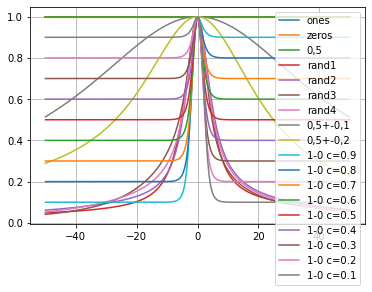

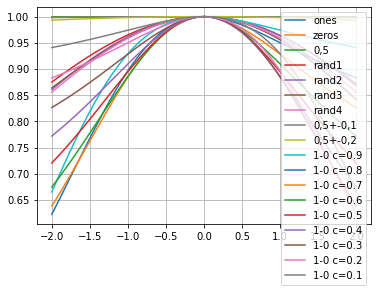

In [120]:
with torch.no_grad():
    lamb_list = torch.linspace(-50,50,200).view(200,1)
    for name,g in g_list.items():
        H = H_fn(g,lamb_list)
        plt.plot(lamb_list,torch.exp(H)/n,label = name)
    plt.legend()
    plt.grid()
    plt.show()
    lamb_list = torch.linspace(-2,2,200).view(200,1)
    for name,g in g_list.items():
        H = H_fn(g,lamb_list)
        plt.plot(lamb_list,torch.exp(H)/n,label = name)
    plt.legend()
    plt.grid()
    plt.show()

In [116]:
lamb_list = torch.tensor(np.linspace(-50,50,200)).view(200,1)
n = 100
g_list = {'ones':torch.ones(n),'zeros':torch.zeros(n),'0,5': 0.5*torch.ones(n),
         'rand1': torch.rand(n), 'rand2':torch.rand(n),
         'rand3': torch.rand(n), 'rand4':torch.rand(n),
         '0,5+-0,1': 0.5*torch.ones(n)+0.1*torch.rand(n),
          '0,5+-0,2':0.5*torch.ones(n)+0.2*torch.rand(n)}

In [102]:
H_fn(g_list['1-0 c=0.8'])

tensor(4.5542)

In [104]:
np.log(0.8*n)

4.382026634673881

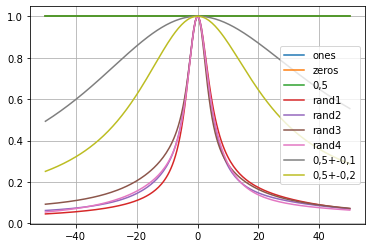

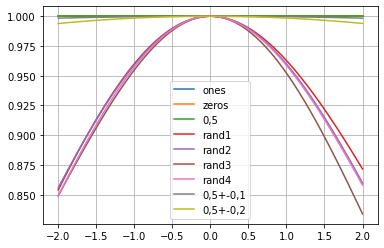

In [117]:
with torch.no_grad():
    lamb_list = torch.linspace(-50,50,200).view(200,1)
    for name,g in g_list.items():
        H = H_fn(g,lamb_list)
        plt.plot(lamb_list,torch.exp(H)/n,label = name)
    plt.legend()
    plt.grid()
    plt.show()
    lamb_list = torch.linspace(-2,2,200).view(200,1)
    for name,g in g_list.items():
        H = H_fn(g,lamb_list)
        plt.plot(lamb_list,torch.exp(H)/n,label = name)
    plt.legend()
    plt.grid()
    plt.show()

In [93]:
entropy(g)

tensor(30.8643)

In [108]:
g = g_list['rand1']

In [109]:
entropy(g)

tensor(24.3966)

In [112]:
entropy(softmax(g))

<ipython-input-112-709d89c2084d>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  entropy(softmax(g))


tensor(4.5607)

In [ ]:
entropy()

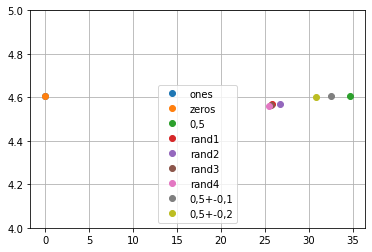

In [98]:
lamb_list = 1
for name,g in g_list.items():
    H = H_fn(g,lamb_list)
    plt.plot(entropy(g),H,'o',label=name)
plt.ylim(4,5)
plt.legend()
plt.grid()
plt.show()

In [ ]:
g_list = {'ones':torch.ones(n),'zeros':torch.zeros(n),
         '1-0 c=0.9': torch.cat((torch.ones(int(0.9*n)),torch.zeros(int(0.1*n)))),
         '1-0 c=0.8': torch.cat((torch.ones(int(0.8*n)),torch.zeros(int(0.2*n)))),
         '1-0 c=0.7': torch.cat((torch.ones(int(0.7*n)),torch.zeros(int(0.3*n)))),
         '1-0 c=0.6': torch.cat((torch.ones(int(0.6*n)),torch.zeros(int(0.4*n)))),
         '1-0 c=0.5': torch.cat((torch.ones(int(0.5*n)),torch.zeros(int(0.5*n)))),
         '1-0 c=0.4': torch.cat((torch.ones(int(0.4*n)),torch.zeros(int(0.6*n)))),
         '1-0 c=0.3': torch.cat((torch.ones(int(0.3*n)),torch.zeros(int(0.7*n)))),
         '1-0 c=0.2': torch.cat((torch.ones(int(0.2*n)),torch.zeros(int(0.8*n)))),
         '1-0 c=0.1': torch.cat((torch.ones(int(0.1*n)),torch.zeros(int(0.9*n))))}

In [ ]:

def lim_h(c,lamb,n=10):
    x = np.exp(lamb)*c*n+(1-c)*n
    h = -(1/x)*(lamb*np.exp(lamb)*c*n+n*np.log(x)*(c-1-np.exp(lamb)*c))
    return h

In [ ]:
lim_h(0.7,1)

In [ ]:
np.log(10)

In [ ]:
lamb_list = np.linspace(-5,5,200).reshape(200,1)
for c in np.arange(0,1.1,0.1):
    H = lim_h(c,lamb_list)
    plt.plot(lamb_list,H,label = f'{c:.1f}')
plt.plot(lim_h(0.8,1),'o')
plt.legend(loc='upper left')
plt.grid()

In [ ]:
lamb_list = torch.tensor(np.linspace(-20,20,200)).view(200,1)
for name,g in g_list.items():
    H = H_fn(g,lamb_list)
    plt.plot(lamb_list,H,label = name)
plt.legend(loc='upper left')
plt.grid()
plt.show()
lamb_list = torch.tensor(np.linspace(-500,500,200)).view(200,1)
for name,g in g_list.items():
    H = H_fn(g,lamb_list)
    plt.plot(lamb_list,H,label = name)
plt.legend()
plt.grid()
plt.show()